<a href="https://colab.research.google.com/github/Hansulich/park/blob/main/social_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0, Loss: 0.691697191011946
Iteration 1000, Loss: 0.37528386983658735
Iteration 2000, Loss: 0.3468024934496998
Iteration 3000, Loss: 0.3379786719418002
Iteration 4000, Loss: 0.334250421478275
Iteration 5000, Loss: 0.3324329708419821
Iteration 6000, Loss: 0.33147190622905287
Iteration 7000, Loss: 0.3309367878640908
Iteration 8000, Loss: 0.33062823864549307
Iteration 9000, Loss: 0.3304458764110654
Gradient Descent Parameters: w0 = -1.0541270957390847, w1 = 2.5548176644116722, w2 = 1.2674477767958992


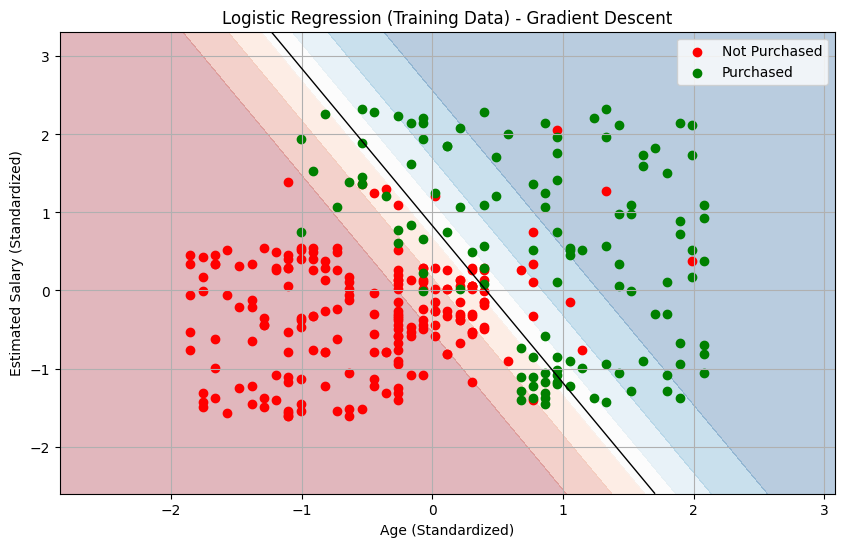

Scikit-learn Parameters: w0 = -1.018003511383291, w1 = 2.3876329857007743, w2 = 1.1849828327790233


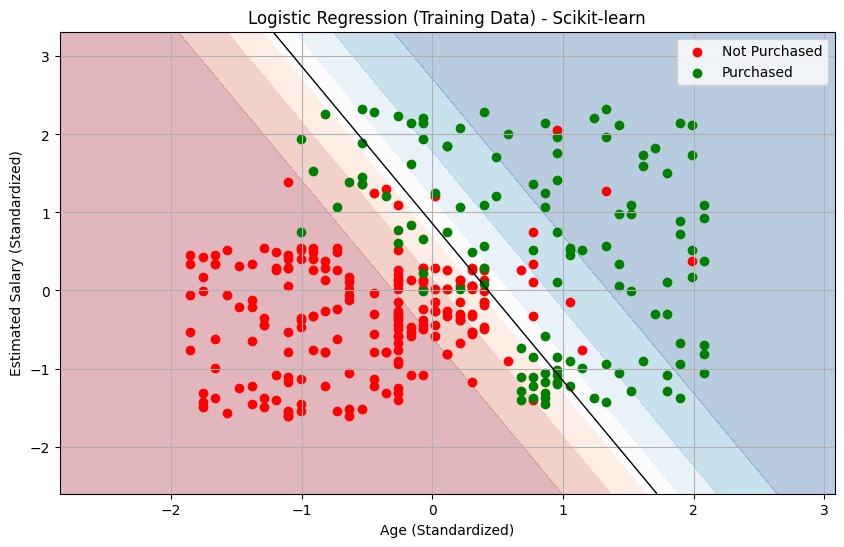

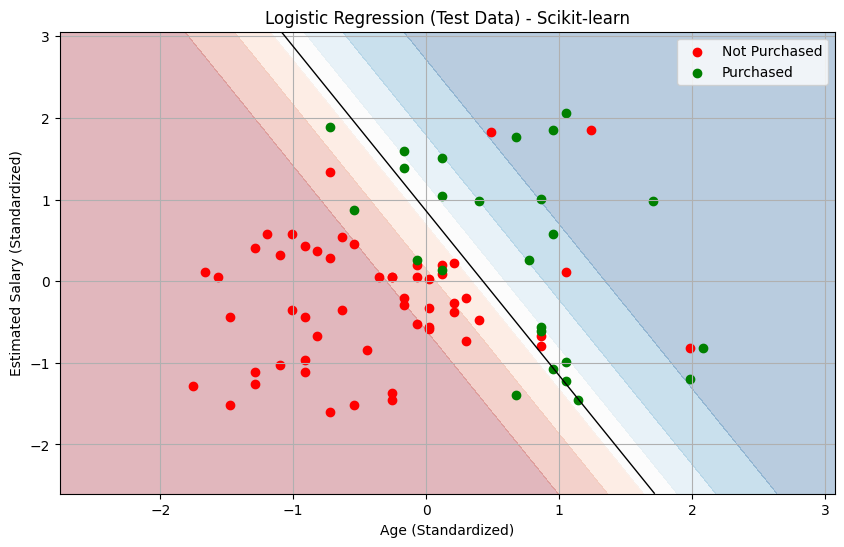

Model Accuracy on Test Data: 83.75%
Gradient Descent Model Accuracy on Test Data: 86.25%


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

url = "https://raw.githubusercontent.com/Hansulich/park/main/Social_Network_Ads.csv"
data = pd.read_csv(url)

# data = pd.read_csv("/Social_Network_Ads.csv")

# 데이터 전처리(preprocessing), Feature 추출
# "Age"(x1)와 "EstimatedSalary"(x2)를 특징 벡터(X)로 사용
X = data.iloc[:, [2, 3]].values  # Age와 EstimatedSalary 컬럼
y = data.iloc[:, 4].values       # Purchased 컬럼

# 학습 데이터를 데이터의 80%(320개), 테스트 데이터를 20%(80개)로 분할 사용
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(len(X) * 0.8)
train_indices = indices[:train_size]
test_indices = indices[train_size:]
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# 특징 스케일링을 통한 수렴성 향상(수동 구현)
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

X_train, mean_train, std_train = standardize(X_train)
X_test = (X_test - mean_train) / std_train

# 학습데이터에 대해 로지스틱회귀 모델 구성
# 예측 함수 : Sigmoid 함수 정의
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 경사하강법을 이용한 로지스틱 회귀 구현
def gradient_descent(X, y, learning_rate=0.01, iterations=10000):
    m, n = X.shape
    X_with_bias = np.c_[np.ones((m, 1)), X]
    weights = np.zeros(n + 1)

    for i in range(iterations):
        z = np.dot(X_with_bias, weights)
        predictions = sigmoid(z)
        gradient = np.dot(X_with_bias.T, (predictions - y)) / m
        weights = weights - learning_rate * gradient

        if i % 1000 == 0:
            z = np.dot(X_with_bias, weights)
            predictions = sigmoid(z)
            loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
            print(f"Iteration {i}, Loss: {loss}")

    return weights

weights = gradient_descent(X_train, y_train)
w0, w1, w2 = weights
print(f"Gradient Descent Parameters: w0 = {w0}, w1 = {w1}, w2 = {w2}")

# 모델의 시각화
def plot_decision_boundary(X, y, weights, title):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))

    X_grid = np.c_[xx1.ravel(), xx2.ravel()]
    X_grid_with_bias = np.c_[np.ones((X_grid.shape[0], 1)), X_grid]
    probs = sigmoid(np.dot(X_grid_with_bias, weights))
    probs = probs.reshape(xx1.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx1, xx2, probs, alpha=0.3, cmap=plt.cm.RdBu)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black')

    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Not Purchased')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Purchased')

    plt.title(title)
    plt.xlabel('Age (Standardized)')
    plt.ylabel('Estimated Salary (Standardized)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_train, y_train, weights, "Logistic Regression (Training Data) - Gradient Descent")

# scikit-learn Library를 이용, 모델 학습하고, 파라미터 값 출력
sk_model = linear_model.LogisticRegression(random_state=42)
sk_model.fit(X_train, y_train)

sk_w0 = sk_model.intercept_[0]
sk_w1, sk_w2 = sk_model.coef_[0]
print(f"Scikit-learn Parameters: w0 = {sk_w0}, w1 = {sk_w1}, w2 = {sk_w2}")

def plot_decision_boundary_sklearn(X, y, model, title):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))

    X_grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = model.predict_proba(X_grid)[:, 1]
    probs = probs.reshape(xx1.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx1, xx2, probs, alpha=0.3, cmap=plt.cm.RdBu)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black')

    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Not Purchased')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Purchased')

    plt.title(title)
    plt.xlabel('Age (Standardized)')
    plt.ylabel('Estimated Salary (Standardized)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary_sklearn(X_train, y_train, sk_model, 'Logistic Regression (Training Data) - Scikit-learn')
plot_decision_boundary_sklearn(X_test, y_test, sk_model, 'Logistic Regression (Test Data) - Scikit-learn')

y_pred = sk_model.predict(X_test)
accuracy = np.mean(y_test == y_pred)
print(f"Model Accuracy on Test Data: {accuracy * 100:.2f}%")

X_test_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
gd_predictions = sigmoid(np.dot(X_test_with_bias, weights))
gd_y_pred = (gd_predictions >= 0.5).astype(int)
gd_accuracy = np.mean(y_test == gd_y_pred)
print(f"Gradient Descent Model Accuracy on Test Data: {gd_accuracy * 100:.2f}%")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')